In [1]:
#Importing essential libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading CSV File.
df = pd.read_csv('Task1.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
#calculating statistical data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'student marks prediction')

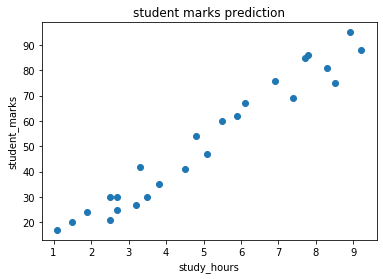

In [6]:
#plotting a graph
plt.scatter(x=df.Hours, y=df.Scores)
plt.xlabel('study_hours')
plt.ylabel('student_marks')
plt.title('student marks prediction')

In [7]:
#data cleaning
# data cleaning
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#split the dataset into dependent and independent variable
marks= df.drop("Scores",axis="columns")
duration=df.drop("Hours",axis = "columns")

In [9]:
marks.shape

(25, 1)

In [10]:
duration.shape

(25, 1)

In [11]:
#train_test_split
from sklearn.model_selection import train_test_split
marks_train,marks_test,duration_train,duration_test=train_test_split(marks,duration,test_size=0.2,random_state=0)

In [12]:
marks_train.shape

(20, 1)

In [13]:
duration_test.shape

(5, 1)

In [14]:
#select a model and train it
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(marks_train,duration_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#printing slope value(y=mx+c)
lr.coef_[0][0].round(2) #m(slope)

9.91

In [16]:
#printing intercept value(y=mx+c)
lr.intercept_[0].round(2)  #c(intercept)

2.02

In [17]:
m = 9.91
c = 2.02
y = m*9.25 + c
y

93.6875

In [18]:
lr.predict([[9.25]])[0][0].round(2)

93.69

In [19]:
score_pred=lr.predict(marks_test)
pd.DataFrame(np.c_[marks_test,duration_test,score_pred],columns=["Hours","original score","predicted score"])

,Hours,original score,predicted score
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [20]:
lr.score(marks_test,duration_test)

0.9454906892105356

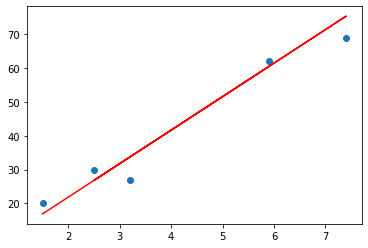

In [21]:
#visualisation
plt.scatter(marks_test,duration_test)
plt.plot(marks_test,lr.predict(marks_test), color='r')

In [22]:
#Testing the model
import pickle 
pickle.dump(lr,open('Task1.pkl','wb'))

In [23]:
model=pickle.load(open('Task1.pkl','rb'))
print(model.predict([[9.25]]))

[[93.69173249]]
